<a href="https://colab.research.google.com/github/Sinha123456/udacity_lesson_project/blob/main/Sampling_Distributions_Difference_in_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)
sample_data.head(4)

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241


In [ ]:
coffee_mean = sample_data.query('drinks_coffee == True')['height'].mean()
nocoffee_mean = sample_data.query('drinks_coffee == False')['height'].mean()
diff_height_mean = coffee_mean - nocoffee_mean
diff_height_mean

1.3347071093073879

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [ ]:
diff_hight = []
for _ in range(10000):
    bootsamp = sample_data.sample(200,replace = True)
    mean_coffee = bootsamp[bootsamp['drinks_coffee']==True]['height'].mean()
    mean_nocoffee = bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    diff_hight.append(mean_coffee - mean_nocoffee)
np.percentile(diff_hight, .5), np.percentile(diff_hight, 99.5)

(0.10258900080919674, 2.5388333707966284)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [ ]:
diff_age = []
for _ in range(10000):
    bootsamp2 = sample_data.sample(200, replace = True)
    older_21 = bootsamp2[bootsamp2['age'] =='>=21']['height'].mean()
    younger_21 = bootsamp2[bootsamp2['age']=='<21']['height'].mean()
    diff_age.append(older_21 - younger_21)
np.percentile(diff_age, 0.5), np.percentile(diff_age, 99.5)

(3.3846249718386421, 5.1051788925372721)

(array([   11.,    64.,   481.,  1447.,  2618.,  2870.,  1754.,   632.,
          110.,    13.]),
 array([ 2.92252522,  3.18192832,  3.44133142,  3.70073451,  3.96013761,
         4.21954071,  4.47894381,  4.73834691,  4.99775   ,  5.2571531 ,
         5.5165562 ]),
 <a list of 10 Patch objects>)

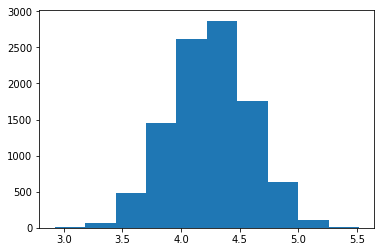

In [ ]:
plt.hist(diff_age)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [ ]:
diff_underage = []
for _ in range(10000):
    bootsamp3 = sample_data.sample(200, replace = True)
    under21_coffee = bootsamp3.query('drinks_coffee == True and age == "<21"')['height'].mean()
    under21_nocoffee = bootsamp3.query('drinks_coffee == False and age == "<21"')['height'].mean()
    diff_underage.append(under21_coffee - under21_nocoffee)
np.percentile(diff_underage, 2.5), np.percentile(diff_underage, 97.5)

(-2.5896789620119245, -1.0854810109996651)

(array([   11.,    59.,   433.,  1602.,  2995.,  2930.,  1492.,   403.,
           68.,     7.]),
 array([-3.44748496, -3.12727589, -2.80706682, -2.48685775, -2.16664868,
        -1.84643961, -1.52623054, -1.20602147, -0.8858124 , -0.56560333,
        -0.24539426]),
 <a list of 10 Patch objects>)

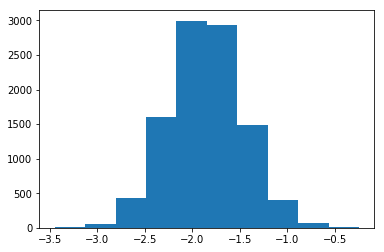

In [ ]:
plt.hist(diff_underage)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [ ]:
diff_over21 = []
for _ in range(10000):
    bootsamp4 = sample_data.sample(200, replace = True)
    over21_coffee = bootsamp4.query('drinks_coffee == True and age == ">=21"')['height'].mean()
    over21_nocoffee = bootsamp4.query('drinks_coffee == False and age == ">=21"')['height'].mean()
    diff_over21.append(over21_coffee - over21_nocoffee)
np.percentile(diff_over21, 2.5), np.percentile(diff_over21, 97.5)

(-4.3679284960258311, -1.8065555122634016)

In [ ]:
plt.hist(diff_over21)